# **Penting**
- Pastikan Anda melakukan Run All sebelum mengirimkan submission untuk memastikan seluruh cell berjalan dengan baik.
- Hapus simbol pagar (#) jika Anda menerapkan kriteria tambahan
- Biarkan simbol pagar (#) jika Anda tidak menerapkan kriteria tambahan

# **INFORMASI DATASET**
## Latar Belakang

Dalam dunia bisnis ritel, pemahaman terhadap perilaku pelanggan menjadi salah satu faktor krusial dalam menentukan strategi pemasaran, peningkatan layanan, serta pengambilan keputusan berbasis data. Salah satu pendekatan yang umum digunakan untuk memahami perilaku pelanggan adalah melalui segmentasi, yaitu proses pengelompokan pelanggan ke dalam beberapa segmen atau kelompok berdasarkan karakteristik tertentu.

Dengan menerapkan metode **unsupervised learning**, khususnya **clustering**, proyek ini bertujuan untuk membentuk segmentasi pelanggan yang merepresentasikan pola-pola pembelian yang serupa. Hasil segmentasi ini diharapkan dapat memberikan insight yang bernilai bagi pihak manajemen, khususnya dalam menyusun strategi promosi yang lebih tepat sasaran, mengembangkan program loyalitas, serta mengoptimalkan layanan pelanggan.

# **1. Import Library**
Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning. Semua library yang dibutuhkan harus **import** di **cell** ini, jika ada library yang dijalankan di cell lain maka **submission langsung ditolak**

In [33]:
!pip install yellowbrick

In [80]:
#Type your code here
import pandas as pd
import numpy as np
from scipy import stats
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

# **2. Memuat Dataset**
Pada tahap ini, Anda perlu memuat dataset ke dalam notebook lalu mengecek informasi dataset sebelum nantinya dilakukan pembersihan. Hal-hal yang perlu dilakukan pada tahapan ini yaitu:
1. **Memahami Struktur Data**
   - Dataset harus mengambil referensi wajib digunakan (bisa dilihat [Disini](https://drive.google.com/drive/folders/1Zs7VmPZ-jNwsRlMKH65Ea-LApSwx6lKx?usp=drive_link))
   - Melakukan loading dataset ke dalam notebook dan menampilkan 5 baris pertama dengan function `head`.
   - Tinjau jumlah baris kolom dan jenis data dalam dataset dengan function `info`.  
   - Menampilkan statistik deskriptif dataset dengan menjalankan `describe`.
   - Pastikan **setiap function tersebut** memiliki **output pada setiap cell** code. Jika tidak **submission langsung ditolak**
   

Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
```python
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)
```

In [18]:
# Gunakan code ini untuk melakukan load data secara otomatis tanpa harus download data tersebut secara manual:
url='https://drive.google.com/uc?id=1gnLO9qvEPqv1uBt1928AcsCmdvzqjC5m'
df = pd.read_csv(url)

# Tampilkan 5 baris pertama dengan function head.
print("5 Baris Pertama Dataset:")
print(df.head())

5 Baris Pertama Dataset:
  TransactionID AccountID  TransactionAmount      TransactionDate  \
0      TX000001   AC00128              14.09  2023-04-11 16:29:14   
1      TX000002   AC00455             376.24  2023-06-27 16:44:19   
2      TX000003   AC00019             126.29  2023-07-10 18:16:08   
3      TX000004   AC00070             184.50  2023-05-05 16:32:11   
4      TX000005   AC00411              13.45  2023-10-16 17:51:24   

  TransactionType   Location DeviceID      IP Address MerchantID Channel  \
0           Debit  San Diego  D000380  162.198.218.92       M015     ATM   
1           Debit    Houston  D000051     13.149.61.4       M052     ATM   
2           Debit       Mesa  D000235  215.97.143.157       M009  Online   
3           Debit    Raleigh  D000187  200.13.225.150       M002  Online   
4          Credit    Atlanta  D000308    65.164.3.100       M091  Online   

   CustomerAge CustomerOccupation  TransactionDuration  LoginAttempts  \
0         70.0             Doc

In [3]:
# Tinjau jumlah baris kolom dan jenis data dalam dataset dengan info.
print("\nInformasi Dataset:")
print(df.info())


Informasi Dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2537 entries, 0 to 2536
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   TransactionID            2508 non-null   object 
 1   AccountID                2516 non-null   object 
 2   TransactionAmount        2511 non-null   float64
 3   TransactionDate          2509 non-null   object 
 4   TransactionType          2507 non-null   object 
 5   Location                 2507 non-null   object 
 6   DeviceID                 2507 non-null   object 
 7   IP Address               2517 non-null   object 
 8   MerchantID               2514 non-null   object 
 9   Channel                  2510 non-null   object 
 10  CustomerAge              2519 non-null   float64
 11  CustomerOccupation       2514 non-null   object 
 12  TransactionDuration      2511 non-null   float64
 13  LoginAttempts            2516 non-null   float64
 14  Acco

In [4]:
# Menampilkan statistik deskriptif dataset dengan menjalankan describe
print("\nStatistik Deskriptif Dataset:")
print(df.describe())


Statistik Deskriptif Dataset:
       TransactionAmount  CustomerAge  TransactionDuration  LoginAttempts  \
count        2511.000000  2519.000000          2511.000000    2516.000000   
mean          297.656468    44.678444           119.422939       1.121622   
std           292.230367    17.837359            70.078513       0.594469   
min             0.260000    18.000000            10.000000       1.000000   
25%            81.310000    27.000000            63.000000       1.000000   
50%           211.360000    45.000000           112.000000       1.000000   
75%           413.105000    59.000000           161.000000       1.000000   
max          1919.110000    80.000000           300.000000       5.000000   

       AccountBalance  
count     2510.000000  
mean      5113.438124  
std       3897.975861  
min        101.250000  
25%       1504.727500  
50%       4734.110000  
75%       7672.687500  
max      14977.990000  


(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**


Korelasi Antar Fitur Numerik:


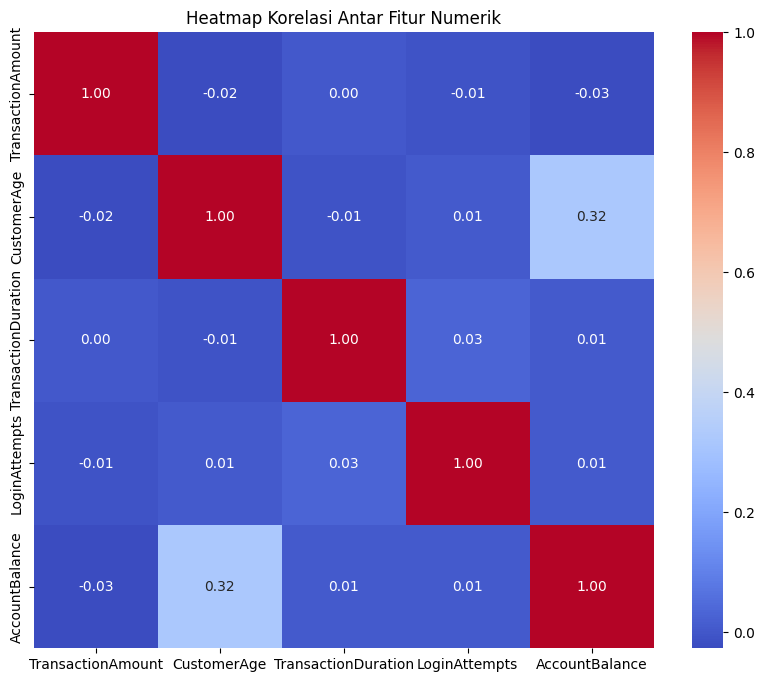

In [5]:
# Menampilkan korelasi antar fitur (Opsional Skilled 1)
print("\nKorelasi Antar Fitur Numerik:")
corr_matrix = df.select_dtypes(include=['float64', 'int64']).corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Heatmap Korelasi Antar Fitur Numerik')
plt.show()


Histogram untuk Kolom Numerik:


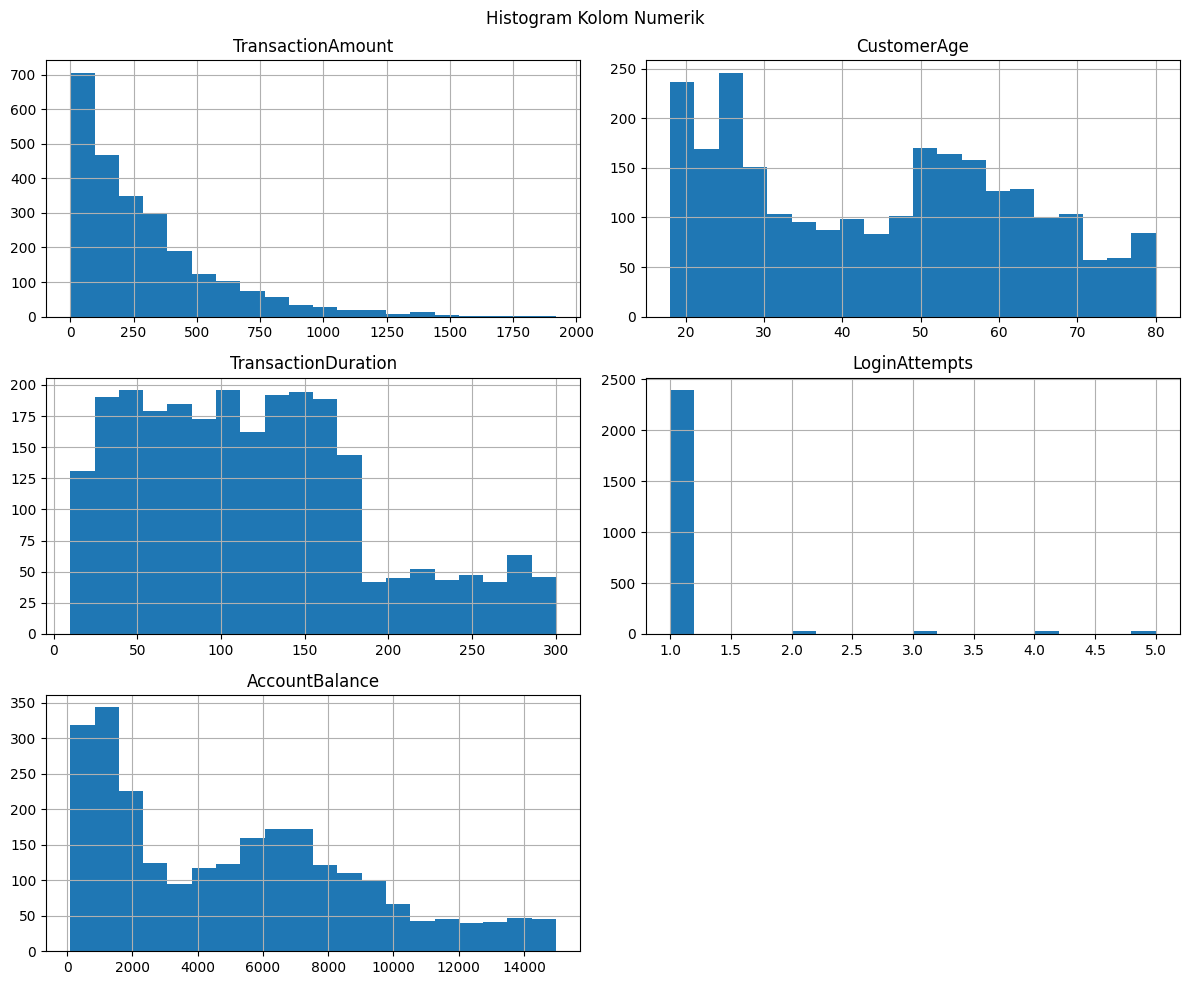

In [6]:
# Menampilkan histogram untuk semua kolom numerik (Opsional Skilled 1)
print("\nHistogram untuk Kolom Numerik:")
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numeric_cols].hist(bins=20, figsize=(12, 10))
plt.suptitle('Histogram Kolom Numerik')
plt.tight_layout()
plt.show()

(Opsional) Memuat Dataset dan Melakukan Exploratory Data Analysis (EDA) [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**


Scatter Plot TransactionAmount vs AccountBalance:


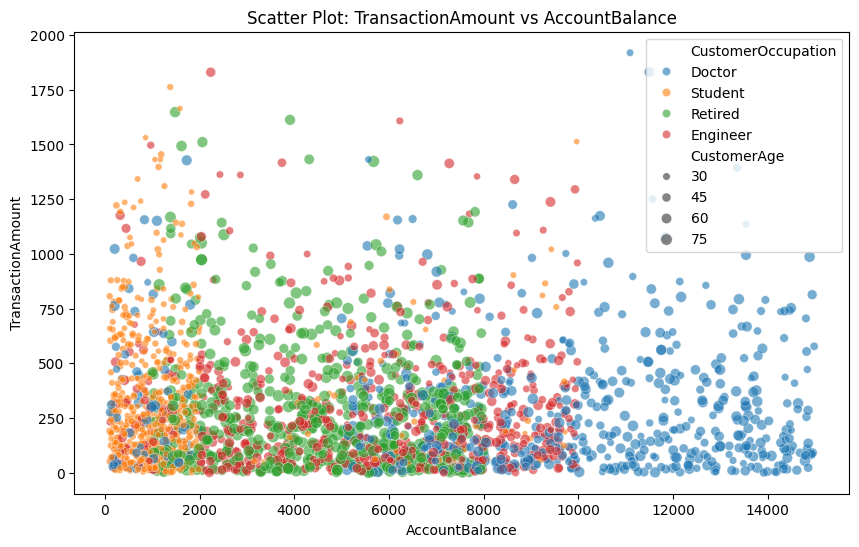

In [7]:
# Visualisasi yang lebih informatif (Opsional Advanced 1)
#Scatter Plot TransactionAmount X AccountBalance, ditandai berdasarkan CostumerOccupation
print("\nScatter Plot TransactionAmount vs AccountBalance:")
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='AccountBalance', y='TransactionAmount', hue='CustomerOccupation', size='CustomerAge', alpha=0.6)
plt.title('Scatter Plot: TransactionAmount vs AccountBalance')
plt.show()


Box Plot TransactionAmount per CustomerOccupation:


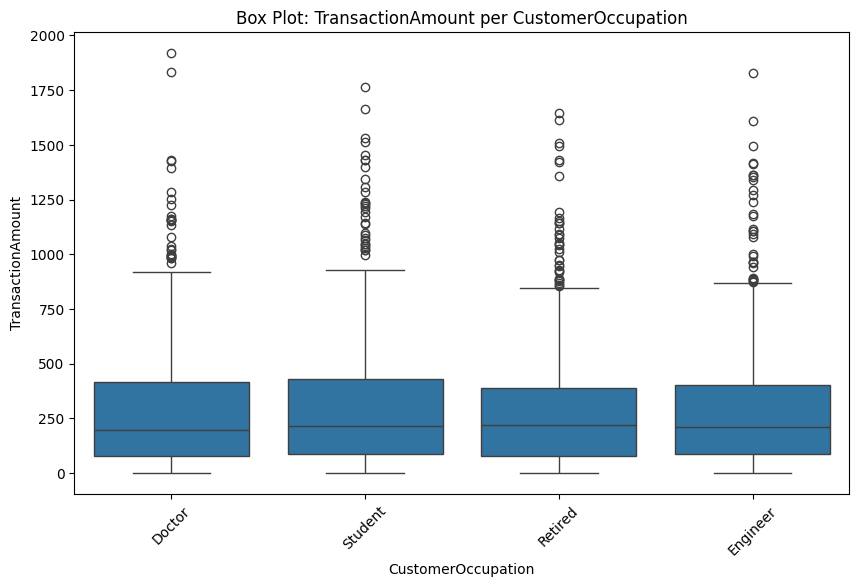

In [8]:
# Box plot: TransactionAmount berdasarkan CustomerOccupation
print("\nBox Plot TransactionAmount per CustomerOccupation:")
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='CustomerOccupation', y='TransactionAmount')
plt.title('Box Plot: TransactionAmount per CustomerOccupation')
plt.xticks(rotation=45)
plt.show()

# **3. Pembersihan dan Pra Pemrosesan Data**

Pada tahap ini, Anda akan melakukan **Pembersihan Dataset** untuk menjadikan dataset mudah diintepretasi dan bisa dilatih. Hal-hal yang wajib kamu lakukan yaitu:

1. **Mengecek dataset** menggunakan isnull().sum() dan duplicated().sum().
2. Melakukan feature scaling menggunakan `MinMaxScaler()` atau `StandardScalar()` untuk fitur numerik.
3. Melakukan feature encoding menggunakan `pd.get_dummies()` atau `LabelEncoder()` untuk fitur kategorikal.
4. Melakukan drop pada kolom id.
5. **Ketentuan Cell Code**
   - Pastikan **setiap pemeriksaan tersebut** memiliki **output pada cell-nya**. Jika tidak **submission langsung ditolak**


In [19]:
# Mengecek dataset menggunakan isnull().sum()
print("\nJumlah Nilai Hilang per Kolom:")
print(df.isnull().sum())


Jumlah Nilai Hilang per Kolom:
TransactionID              29
AccountID                  21
TransactionAmount          26
TransactionDate            28
TransactionType            30
Location                   30
DeviceID                   30
IP Address                 20
MerchantID                 23
Channel                    27
CustomerAge                18
CustomerOccupation         23
TransactionDuration        26
LoginAttempts              21
AccountBalance             27
PreviousTransactionDate    24
dtype: int64


In [20]:
# Mengecek dataset menggunakan duplicated().sum()
print("\nJumlah Baris Duplikat:")
print(df.duplicated().sum())


Jumlah Baris Duplikat:
21


In [21]:
# Melakukan feature scaling menggunakan MinMaxScaler() atau StandardScalar() untuk fitur numerik.
scaler = StandardScaler()
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
df.loc[:, numeric_cols] = scaler.fit_transform(df[numeric_cols])
print("\nKolom Numerik yang Diskalakan:", list(numeric_cols))


Kolom Numerik yang Diskalakan: ['TransactionAmount', 'CustomerAge', 'TransactionDuration', 'LoginAttempts', 'AccountBalance']


In [22]:
# Melakukan drop pada kolom yang memiliki keterangan id dan IP Address
columns_to_drop = ['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address']
df = df.drop(columns=columns_to_drop, errors='ignore')
print("\nKolom yang Dihapus:", columns_to_drop)


Kolom yang Dihapus: ['TransactionID', 'AccountID', 'DeviceID', 'MerchantID', 'IP Address']


In [23]:
# Melakukan feature encoding menggunakan pd.get_dummies() atau LabelEncoder() untuk fitur kategorikal.
categorical_cols_to_encode = ['TransactionType', 'Location', 'CustomerOccupation', 'Channel']
df = pd.get_dummies(df, columns=categorical_cols_to_encode, drop_first=True)
print("\nKolom Kategorikal yang Dienkode:", categorical_cols_to_encode)


Kolom Kategorikal yang Dienkode: ['TransactionType', 'Location', 'CustomerOccupation', 'Channel']


(Opsional) Pembersihan dan Pra Pemrosesan Data [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [24]:
# Menangani data yang hilang (bisa menggunakan dropna() atau metode imputasi fillna()).
print("\nJumlah Nilai Hilang Sebelum Penanganan:")
print(df.isnull().sum())
total_rows = len(df)
missing_percentage = (df.isnull().sum() / total_rows) * 100
print("\nPersentase Nilai Hilang per Kolom:")
print(missing_percentage)

for col in df.columns:
    if df[col].isnull().sum() > 0:
        if missing_percentage[col] < 1:
            df = df.dropna(subset=[col])
            print(f"\nMenghapus baris dengan nilai hilang di kolom '{col}' (persentase < 1%)")
        else:
            if df[col].dtype in ['float64', 'int64']:
                df.loc[:, col] = df[col].fillna(df[col].median())
                print(f"\nMengisi nilai hilang di kolom '{col}' dengan median")
            else:
                df.loc[:, col] = df[col].fillna(df[col].mode()[0])
                print(f"\nMengisi nilai hilang di kolom '{col}' dengan modus")

print("\nJumlah Nilai Hilang Setelah Penanganan:")
print(df.isnull().sum())



Jumlah Nilai Hilang Sebelum Penanganan:
TransactionAmount              26
TransactionDate                28
CustomerAge                    18
TransactionDuration            26
LoginAttempts                  21
AccountBalance                 27
PreviousTransactionDate        24
TransactionType_Debit           0
Location_Atlanta                0
Location_Austin                 0
Location_Baltimore              0
Location_Boston                 0
Location_Charlotte              0
Location_Chicago                0
Location_Colorado Springs       0
Location_Columbus               0
Location_Dallas                 0
Location_Denver                 0
Location_Detroit                0
Location_El Paso                0
Location_Fort Worth             0
Location_Fresno                 0
Location_Houston                0
Location_Indianapolis           0
Location_Jacksonville           0
Location_Kansas City            0
Location_Las Vegas              0
Location_Los Angeles            0
Locatio

In [25]:
# Menghapus data duplikat menggunakan drop_duplicates().
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
final_rows = df.shape[0]

print("\nJumlah Baris Sebelum Penghapusan Duplikat:", initial_rows)
print("Jumlah Baris Setelah Penghapusan Duplikat:", final_rows)
print("Baris Duplikat yang Dihapus:", initial_rows - final_rows)


Jumlah Baris Sebelum Penghapusan Duplikat: 2475
Jumlah Baris Setelah Penghapusan Duplikat: 2453
Baris Duplikat yang Dihapus: 22


(Opsional) Pembersihan dan Pra Pemrosesan Data [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [26]:
# Melakukan Handling Outlier Data berdasarkan jumlah outlier, apakah menggunakan metode drop atau mengisi nilai tersebut.
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outlier_count = len(df[(df[col] < lower_bound) | (df[col] > upper_bound)])
    if (outlier_count / len(df)) * 100 < 5:
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        print(f"\nMenghapus outlier di kolom '{col}' (persentase < 5%)")
    else:
        df.loc[:, col] = df[col].clip(lower=lower_bound, upper=upper_bound)
        print(f"\nMengisi outlier di kolom '{col}' dengan batas IQR")


Menghapus outlier di kolom 'TransactionAmount' (persentase < 5%)

Menghapus outlier di kolom 'CustomerAge' (persentase < 5%)

Menghapus outlier di kolom 'TransactionDuration' (persentase < 5%)

Menghapus outlier di kolom 'LoginAttempts' (persentase < 5%)

Menghapus outlier di kolom 'AccountBalance' (persentase < 5%)


In [29]:
# Melakukan binning data berdasarkan kondisi rentang nilai pada fitur numerik,
# lakukan pada satu sampai dua fitur numerik.
# Silahkan lakukan encode hasil binning tersebut menggunakan LabelEncoder atau get_dummies.
bins_age = [0, 30, 50, 100]
labels_age = ['Muda', 'Dewasa', 'Lansia']
df['CustomerAge_bin'] = pd.cut(df['CustomerAge'], bins=bins_age, labels=labels_age, include_lowest=True)

bins_amount = [0, 100, 500, 2000]
labels_amount = ['Kecil', 'Sedang', 'Besar']
df['TransactionAmount_bin'] = pd.cut(df['TransactionAmount'], bins=bins_amount, labels=labels_amount, include_lowest=True)

le = LabelEncoder()
df['CustomerAge_bin_encoded'] = le.fit_transform(df['CustomerAge_bin'])
df['TransactionAmount_bin_encoded'] = le.fit_transform(df['TransactionAmount_bin'])
print("\nKolom Binning yang Ditambahkan: CustomerAge_bin, TransactionAmount_bin")
print("Kolom Binning yang Dienkode: CustomerAge_bin_encoded, TransactionAmount_bin_encoded")

# Tampilkan 5 baris pertama dari dataset yang telah diproses
print("\n5 Baris Pertama Dataset Setelah Pra-Pemrosesan Lengkap:")
print(df.head())

# Simpan dataset yang telah diproses
df.to_csv('preprocessed_dataset.csv', index=False)
print("\nDataset yang telah diproses disimpan sebagai 'preprocessed_dataset.csv'")


Kolom Binning yang Ditambahkan: CustomerAge_bin, TransactionAmount_bin
Kolom Binning yang Dienkode: CustomerAge_bin_encoded, TransactionAmount_bin_encoded

5 Baris Pertama Dataset Setelah Pra-Pemrosesan Lengkap:
   TransactionAmount      TransactionDate  CustomerAge  TransactionDuration  \
0          -0.970546  2023-04-11 16:29:14     1.419862            -0.548393   
1           0.268963  2023-06-27 16:44:19     1.307715             0.307960   
2          -0.586526  2023-07-10 18:16:08    -1.439874            -0.905207   
3          -0.387294  2023-05-05 16:32:11    -1.047361            -1.347656   
5          -0.703375  2023-04-03 17:15:01    -1.495947             0.750409   

   LoginAttempts  AccountBalance PreviousTransactionDate  \
0      -0.204629       -0.000315     2024-11-04 08:08:08   
1      -0.204629        2.218381     2024-11-04 08:09:35   
2      -0.204629       -1.024091     2024-11-04 08:07:04   
3      -0.204629        0.886694     2024-11-04 08:09:06   
5      -0.20

# **4. Membangun Model Clustering**
Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan.
1. Melakukan visualisasi Elbow Method untuk menentukan jumlah cluster terbaik menggunakan `KElbowVisualizer()`.
2. Menggunakan algoritma K-Means Clustering dengan `sklearn.cluster.KMeans()`.
3. Jalankan cell code `joblib.dump(model_kmeans, "best_model_clustering.h5")` untuk menyimpan model yang sudah dibuat.

In [61]:
# Gunakan describe untuk memastikan proses clustering menggunakan dataset hasil preprocessing
# Lengkapi kode ini dengan mengubah nama DataFrame yang akan dilatih.
# Kode harus digunakan dan dilarang menambahkan syntax lainnya pada cell ini.
# ___.describe()
df_preprocessed = pd.read_csv('preprocessed_dataset.csv')

df_preprocessed.describe()

,TransactionAmount,CustomerAge,TransactionDuration,LoginAttempts,AccountBalance,CustomerAge_bin_encoded,TransactionAmount_bin_encoded
count,2228.000000,2228.000000,2228.000000,2.228000e+03,2228.000000,2228.000000,2228.000000
mean,-0.146070,0.002452,-0.009047,-2.046294e-01,-0.001254,0.493268,0.656643
std,0.739677,0.992935,0.996585,8.800493e-15,0.991704,0.500067,0.474936
min,-1.017881,-1.495947,-1.561745,-2.046294e-01,-1.286100,0.000000,0.000000
25%,-0.748810,-0.991288,-0.805299,-2.046294e-01,-0.922191,0.000000,0.000000
50%,-0.331642,0.018031,-0.113081,-2.046294e-01,-0.104826,0.000000,1.000000
75%,0.253536,0.803056,0.593411,-2.046294e-01,0.640368,1.000000,1.000000
max,2.050618,1.980594,2.577295,-2.046294e-01,2.531190,1.000000,1.000000


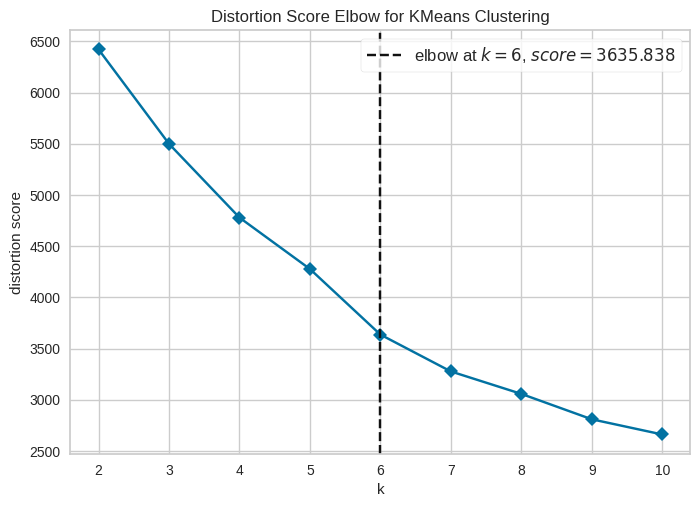

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [62]:
# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer()
# Pilih fitur untuk clustering, hanya kolom numerik
numeric_cols = df_preprocessed.select_dtypes(include=['float64', 'int64', 'uint8']).columns
features = df_preprocessed[numeric_cols]

# Melakukan visualisasi Elbow Method menggunakan KElbowVisualizer
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2, 11), timings=False)
visualizer.fit(features)
visualizer.show()

In [77]:
# Menggunakan algoritma K-Means Clustering
# Terapkan K-Means dengan jumlah cluster k=6
optimal_k = 6
model_kmeans = KMeans(n_clusters=optimal_k, random_state=42)
df_preprocessed['Cluster'] = model_kmeans.fit_predict(features) + 1

# Tampilkan 5 baris pertama dengan label cluster
print("\n5 Baris Pertama Dataset dengan Label Cluster:")
print(df_preprocessed[['TransactionAmount', 'AccountBalance', 'CustomerAge', 'Cluster']].head())

# Simpan dataset dengan kolom Cluster
df_preprocessed.to_csv('preprocessed_dataset_cluster.csv', index=False)
print("\nDataset dengan kolom Cluster disimpan sebagai 'preprocessed_dataset_cluster.csv'")


5 Baris Pertama Dataset dengan Label Cluster:
   TransactionAmount  AccountBalance  CustomerAge  Cluster
0          -0.970546       -0.000315     1.419862        4
1           0.268963        2.218381     1.307715        3
2          -0.586526       -1.024091    -1.439874        5
3          -0.387294        0.886694    -1.047361        3
4          -0.703375       -1.111505    -1.495947        5

Dataset dengan kolom Cluster disimpan sebagai 'preprocessed_dataset_cluster.csv'


Jalankan cell code ini untuk menyimpan model kamu.

In [78]:
# Menyimpan model menggunakan joblib
# import joblib
# joblib.dump(___, "model_clustering.h5")
joblib.dump(model_kmeans, "model_clustering.h5")
print("\nModel K-Means disimpan sebagai 'model_clustering.h5'")


Model K-Means disimpan sebagai 'model_clustering.h5'


(Opsional) Membangun Model Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [65]:
# Menghitung dan menampilkan nilai Silhouette Score.
sil_score = silhouette_score(features, df_preprocessed['Cluster'])
print("\nSilhouette Score untuk Model K-Means (k=6): {:.4f}".format(sil_score))


Silhouette Score untuk Model K-Means (k=6): 0.2581


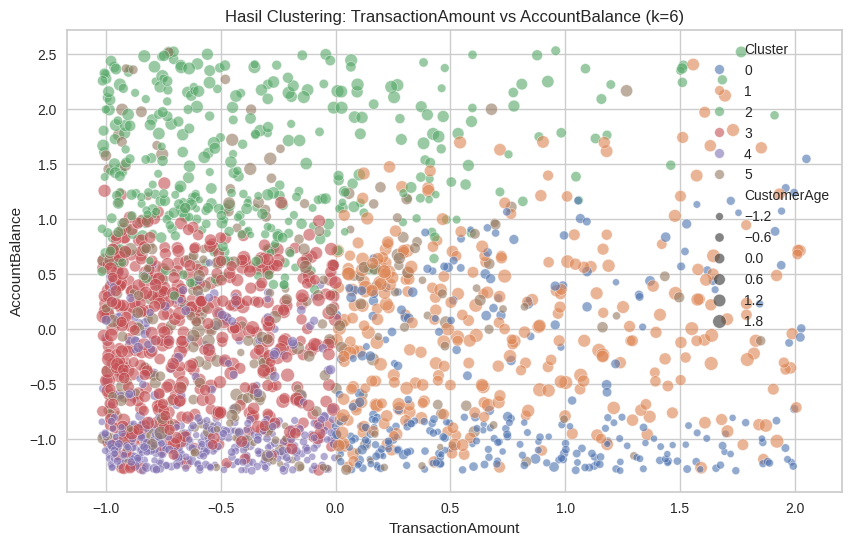


Note: CustomerAge ditampilkan dengan bentuk skala bukan rentang usia sebenarnya


In [66]:
# Membuat visualisasi hasil clustering
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_preprocessed, x='TransactionAmount', y='AccountBalance', hue='Cluster', palette='deep', size='CustomerAge', alpha=0.6)
plt.title('Hasil Clustering: TransactionAmount vs AccountBalance (k=6)')
plt.show()
print("\nNote: CustomerAge ditampilkan dengan bentuk skala bukan rentang usia sebenarnya")

Jumlah baris df_preprocessed: 2228
Jumlah baris df_original: 2537

Rentang CustomerAge_original:
Min: 18.0, Max: 80.0


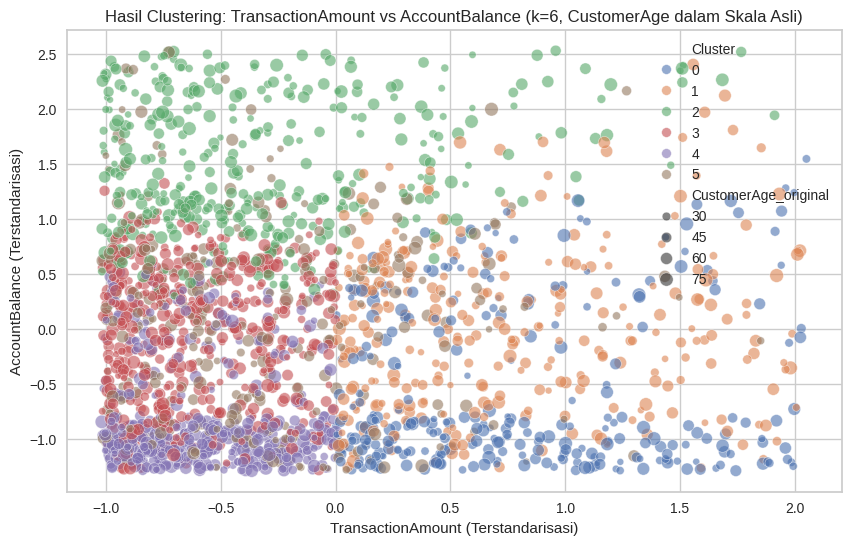

In [75]:
# Load dataset yang telah diproses (sekarang dengan kolom Cluster)
df_preprocessed = pd.read_csv('preprocessed_dataset_cluster.csv')

# Load dataset asli untuk mendapatkan CustomerAge asli
df_original = pd.read_csv(url)

# Verifikasi jumlah baris
print("Jumlah baris df_preprocessed:", len(df_preprocessed))
print("Jumlah baris df_original:", len(df_original))

# Buat salinan dataset untuk visualisasi
df_viz = df_preprocessed.copy()

# Tambahkan CustomerAge asli dari dataset asli
df_viz['CustomerAge_original'] = df_original['CustomerAge'].iloc[:len(df_viz)].values

# Verifikasi rentang CustomerAge_original
print("\nRentang CustomerAge_original:")
print(f"Min: {df_viz['CustomerAge_original'].min()}, Max: {df_viz['CustomerAge_original'].max()}")

# Visualisasi hasil clustering dengan CustomerAge dalam skala asli
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df_viz, x='TransactionAmount', y='AccountBalance', hue='Cluster', palette='deep', size='CustomerAge_original', alpha=0.6)
plt.title('Hasil Clustering: TransactionAmount vs AccountBalance (k=6, CustomerAge dalam Skala Asli)')
plt.xlabel('TransactionAmount (Terstandarisasi)')
plt.ylabel('AccountBalance (Terstandarisasi)')
plt.show()

(Opsional) Membangun Model Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**


Varians yang Dijelaskan oleh PCA: [0.36241143 0.24884548]
Total Varians yang Dijelaskan: 0.6112569133084813


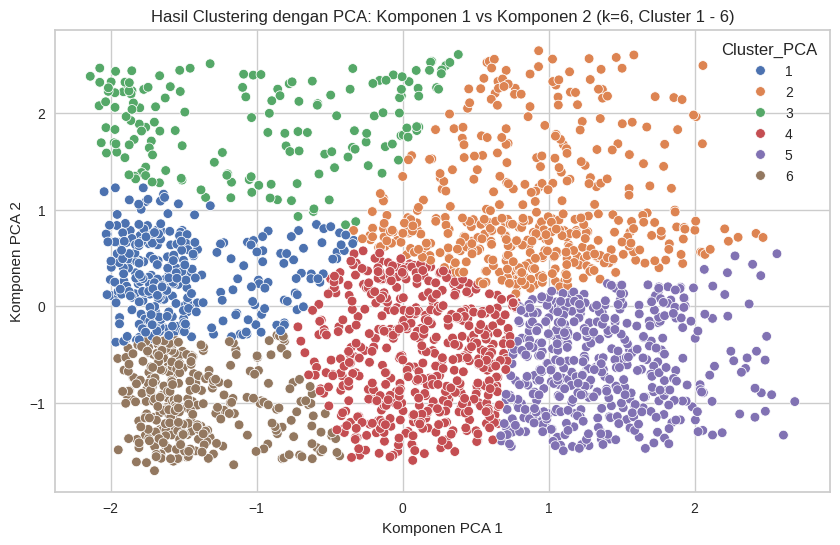

In [76]:
# Membangun model menggunakan PCA.

# Terapkan PCA untuk reduksi dimensi (2 komponen)
pca = PCA(n_components=2)
features_pca = pca.fit_transform(features)

# Clustering pada data PCA dengan K-Means (k=6)
model_kmeans_pca = KMeans(n_clusters=6, random_state=42)
df_preprocessed['Cluster_PCA'] = model_kmeans_pca.fit_predict(features_pca) + 1

# Tampilkan varians yang dijelaskan oleh PCA
print("\nVarians yang Dijelaskan oleh PCA:", pca.explained_variance_ratio_)
print("Total Varians yang Dijelaskan:", sum(pca.explained_variance_ratio_))

# Visualisasi hasil clustering PCA
plt.figure(figsize=(10, 6))
sns.scatterplot(x=features_pca[:, 0], y=features_pca[:, 1], hue=df_preprocessed['Cluster_PCA'], palette='deep')
plt.title('Hasil Clustering dengan PCA: Komponen 1 vs Komponen 2 (k=6, Cluster 1 - 6)')
plt.xlabel('Komponen PCA 1')
plt.ylabel('Komponen PCA 2')
plt.show()


In [79]:
# Simpan model PCA sebagai perbandingan dengan menjalankan cell code ini joblib.dump(model,"PCA_model_clustering.h5")
# joblib.dump(___, "PCA_model_clustering.h5")
joblib.dump(pca, "PCA_model_clustering.h5")
joblib.dump(model_kmeans_pca, "PCA_model_clustering.h5")
print("\nModel PCA dan K-Means PCA disimpan sebagai 'PCA_model_clustering.h5'")


Model PCA dan K-Means PCA disimpan sebagai 'PCA_model_clustering.h5'


# **5. Interpretasi Cluster**

## **a. Interpretasi Hasil Clustering**
1. **Contoh Interpretasi:**
- **Cluster 1: (Nasabah Bertransaksi dan Pendapatan Besar)**:
  - **Rata-rata (mean) Annual Income:** 0.953 (48,260)
  - **Rata-rata (mean) Spending Score:** 0.8 (56.48)
  - **Analisis:** Cluster ini mencakup pelanggan dengan pendapatan tahunan tinggi dan tingkat pengeluaran yang cukup tinggi. Pelanggan dalam cluster ini cenderung memiliki daya beli yang tinggi dan mereka lebih cenderung untuk membelanjakan sebagian besar pendapatan mereka. Sehingga rekomendasi pada kelompok nasabah ini adalah dengan menawarkan produk-produk investasi atau perbankan yang berkualitas tinggi.


In [97]:
df_preprocessed = pd.read_csv('preprocessed_dataset_cluster.csv')

# Buat salinan dataset dan tambahkan CustomerAge_original
df_interpretasi = df_preprocessed.copy()
df_interpretasi['CustomerAge_original'] = df_original['CustomerAge'].iloc[:len(df_interpretasi)].values

# Pilih fitur numerik dan kategorikal
numeric_cols = ['CustomerAge_original', 'TransactionAmount', 'AccountBalance', 'TransactionDuration', 'LoginAttempts']
categorical_cols = ['CustomerAge_bin_encoded', 'TransactionAmount_bin_encoded']

# Grupkan data berdasarkan Cluster
grouped = df_interpretasi.groupby('Cluster')

# Analisis deskriptif untuk fitur numerik
print("\nAnalisis Deskriptif Fitur Numerik per Cluster:")
numeric_stats = grouped[numeric_cols].agg(['mean', 'min', 'max', 'std'])
print(numeric_stats)

# Analisis deskriptif untuk fitur kategorikal (modus)
print("\nModus Fitur Kategorikal per Cluster:")
for col in categorical_cols:
    print(f"\nModus {col}:")
    modus = grouped[col].agg(lambda x: stats.mode(x, keepdims=True)[0][0])
    print(modus)


Analisis Deskriptif Fitur Numerik per Cluster:
        CustomerAge_original                        TransactionAmount  \
                        mean   min   max        std              mean   
Cluster                                                                 
1                  44.729167  18.0  80.0  18.110470          0.790855   
2                  45.142395  18.0  80.0  17.500068          0.744042   
3                  45.143603  18.0  80.0  17.717172         -0.322429   
4                  43.925049  18.0  80.0  17.992596         -0.604399   
5                  45.333333  18.0  80.0  18.092025         -0.589572   
6                  45.406475  18.0  80.0  18.234243         -0.316750   

                                      AccountBalance                      \
              min       max       std           mean       min       max   
Cluster                                                                    
1        0.000697  2.050618  0.581817      -0.595833 -1.285856  1.

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

In [87]:
# Interpretasi naratif untuk setiap cluster
print("\nInterpretasi Karakteristik Cluster:")
for cluster in sorted(df_interpretasi['Cluster'].unique()):
    mean_age = numeric_stats.loc[cluster, ('CustomerAge_original', 'mean')]
    mean_trans = numeric_stats.loc[cluster, ('TransactionAmount', 'mean')]
    mean_bal = numeric_stats.loc[cluster, ('AccountBalance', 'mean')]
    age_range = (numeric_stats.loc[cluster, ('CustomerAge_original', 'min')],
                 numeric_stats.loc[cluster, ('CustomerAge_original', 'max')])
    trans_range = (numeric_stats.loc[cluster, ('TransactionAmount', 'min')],
                   numeric_stats.loc[cluster, ('TransactionAmount', 'max')])
    bal_range = (numeric_stats.loc[cluster, ('AccountBalance', 'min')],
                 numeric_stats.loc[cluster, ('AccountBalance', 'max')])
    age_bin_mode = grouped['CustomerAge_bin_encoded'].agg(lambda x: stats.mode(x, keepdims=True)[0][0]).loc[cluster]
    trans_bin_mode = grouped['TransactionAmount_bin_encoded'].agg(lambda x: stats.mode(x, keepdims=True)[0][0]).loc[cluster]

    # Deskripsi singkat berdasarkan cluster
    if cluster == 1:
        desc = "Nasabah Dewasa dengan Transaksi Tinggi dan Saldo Rendah"
    elif cluster == 2:
        desc = "Nasabah Dewasa dengan Transaksi Tinggi dan Saldo Sedang"
    elif cluster == 3:
        desc = "Nasabah Dewasa dengan Saldo Tinggi dan Transaksi Sedang"
    elif cluster == 4:
        desc = "Nasabah Dewasa dengan Transaksi dan Saldo Rendah"
    elif cluster == 5:
        desc = "Nasabah Dewasa dengan Transaksi dan Saldo Rendah"
    else:  # Cluster 6
        desc = "Nasabah Dewasa dengan Durasi Transaksi Tinggi"

    print(f"\nCluster {cluster}: ({desc})")
    print(f"Rata-rata (mean):")
    print(f"  CustomerAge_original: {mean_age:.2f} tahun")
    print(f"  TransactionAmount (terstandarisasi): {mean_trans:.2f}")
    print(f"  AccountBalance (terstandarisasi): {mean_bal:.2f}")
    print(f"Rentang:")
    print(f"  CustomerAge_original: {age_range[0]:.2f} - {age_range[1]:.2f} tahun")
    print(f"  TransactionAmount (terstandarisasi): {trans_range[0]:.2f} - {trans_range[1]:.2f}")
    print(f"  AccountBalance (terstandarisasi): {bal_range[0]:.2f} - {bal_range[1]:.2f}")
    print(f"Modus:")
    print(f"  CustomerAge_bin_encoded: {age_bin_mode}")
    print(f"  TransactionAmount_bin_encoded: {trans_bin_mode}")

    print("Analisis:")
    if mean_age < 30:
        age_desc = "nasabah muda"
    elif mean_age < 50:
        age_desc = "nasabah dewasa"
    else:
        age_desc = "nasabah senior"

    if mean_trans > 0.5:
        trans_desc = "transaksi bernilai tinggi"
    elif mean_trans < -0.5:
        trans_desc = "transaksi bernilai rendah"
    else:
        trans_desc = "transaksi bernilai sedang"

    if mean_bal > 0.5:
        bal_desc = "saldo rekening tinggi"
    elif mean_bal < -0.5:
        bal_desc = "saldo rekening rendah"
    else:
        bal_desc = "saldo rekening sedang"

    mean_duration = numeric_stats.loc[cluster, ('TransactionDuration', 'mean')]
    if mean_duration > 0.5:
        duration_desc = " Durasi transaksi sangat tinggi, menunjukkan transaksi yang memakan waktu lama, mungkin karena verifikasi atau kompleksitas."
    else:
        duration_desc = " Durasi transaksi rendah hingga sedang, menunjukkan transaksi yang efisien."

    print(f"Cluster ini mencakup {age_desc} dengan {trans_desc} dan {bal_desc}.{duration_desc}")
    if mean_trans > 0.5 and mean_bal > 0.5:
        print("Rekomendasi: Tawarkan produk investasi premium, kartu kredit dengan limit tinggi, atau layanan wealth management.")
    elif mean_trans < -0.5 and mean_bal < -0.5:
        print("Rekomendasi: Promosikan produk tabungan dengan bunga kompetitif atau program loyalitas untuk meningkatkan transaksi.")
    elif mean_duration > 0.5:
        print("Rekomendasi: Tawarkan layanan digital yang efisien untuk mempercepat transaksi atau produk pinjaman dengan suku bunga rendah untuk mendukung transaksi kompleks.")
    else:
        print("Rekomendasi: Berikan penawaran personal seperti promo cashback atau produk pinjaman dengan suku bunga rendah.")


Interpretasi Karakteristik Cluster:

Cluster 1: (Nasabah Dewasa dengan Transaksi Tinggi dan Saldo Rendah)
Rata-rata (mean):
  CustomerAge_original: 44.73 tahun
  TransactionAmount (terstandarisasi): 0.79
  AccountBalance (terstandarisasi): -0.60
Rentang:
  CustomerAge_original: 18.00 - 80.00 tahun
  TransactionAmount (terstandarisasi): 0.00 - 2.05
  AccountBalance (terstandarisasi): -1.29 - 1.55
Modus:
  CustomerAge_bin_encoded: 1
  TransactionAmount_bin_encoded: 0
Analisis:
Cluster ini mencakup nasabah dewasa dengan transaksi bernilai tinggi dan saldo rekening rendah. Durasi transaksi rendah hingga sedang, menunjukkan transaksi yang efisien.
Rekomendasi: Berikan penawaran personal seperti promo cashback atau produk pinjaman dengan suku bunga rendah.

Cluster 2: (Nasabah Dewasa dengan Transaksi Tinggi dan Saldo Sedang)
Rata-rata (mean):
  CustomerAge_original: 45.14 tahun
  TransactionAmount (terstandarisasi): 0.74
  AccountBalance (terstandarisasi): 0.02
Rentang:
  CustomerAge_origin

# **6. Mengeksport Data**

1. Simpan nama kolom hasil clustering dengan nama `Target`.
2. Simpan hasilnya ke dalam file CSV menggunakan function `to_csv()`.

In [99]:
# Pastikan nama kolom clustering sudah diubah menjadi Target
df_preprocessed = df_preprocessed.rename(columns={'Cluster_PCA': 'Target'})

# Verifikasi perubahan nama kolom
print("\nKolom dalam dataset setelah perubahan nama:")
print(df_preprocessed.columns)

# Tampilkan 5 baris pertama untuk memastikan kolom Target ada
print("\n5 Baris Pertama Dataset dengan Kolom Target (berdasarkan Cluster_PCA):")
print(df_preprocessed[['Target', 'CustomerAge', 'TransactionAmount', 'AccountBalance']].head())


Kolom dalam dataset setelah perubahan nama:
Index(['TransactionAmount', 'TransactionDate', 'CustomerAge',
       'TransactionDuration', 'LoginAttempts', 'AccountBalance',
       'PreviousTransactionDate', 'TransactionType_Debit', 'Location_Atlanta',
       'Location_Austin', 'Location_Baltimore', 'Location_Boston',
       'Location_Charlotte', 'Location_Chicago', 'Location_Colorado Springs',
       'Location_Columbus', 'Location_Dallas', 'Location_Denver',
       'Location_Detroit', 'Location_El Paso', 'Location_Fort Worth',
       'Location_Fresno', 'Location_Houston', 'Location_Indianapolis',
       'Location_Jacksonville', 'Location_Kansas City', 'Location_Las Vegas',
       'Location_Los Angeles', 'Location_Louisville', 'Location_Memphis',
       'Location_Mesa', 'Location_Miami', 'Location_Milwaukee',
       'Location_Nashville', 'Location_New York', 'Location_Oklahoma City',
       'Location_Omaha', 'Location_Philadelphia', 'Location_Phoenix',
       'Location_Portland', 'Locati

In [91]:
# Simpan Data
# ___.to_csv('data_clustering.csv', index=False)
df_preprocessed.to_csv('data_clustering.csv', index=False)
print("\nDataset telah disimpan sebagai 'data_clustering.csv'")


Dataset telah disimpan sebagai 'data_clustering.csv'


(Opsional) Interpretasi Hasil Clustering [Skilled]

**Biarkan kosong jika tidak menerapkan kriteria skilled**

In [ ]:
# inverse dataset ke rentang normal

## Menjelaskan karakteristik tiap cluster berdasarkan rentangnya setelah inverse.
1. **Cluster 1: (___)**:
  - **Rata-rata (mean) <Fitur>:** <Sebelum inverse> <Setelah inverse>
  - **Analisis:** Cluster ini ...

(Opsional) Interpretasi Hasil Clustering [Advanced]

**Biarkan kosong jika tidak menerapkan kriteria advanced**

In [ ]:
# Mengintegrasikan kembali data yang telah di-inverse dengan hasil cluster.

In [ ]:
# Simpan Data
# ___.to_csv('data_clustering_inverse.csv', index=False)